<a href="https://colab.research.google.com/github/yagniksram007/Neural_Networks_Lab/blob/main/NN_Lab_Programs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Program 1

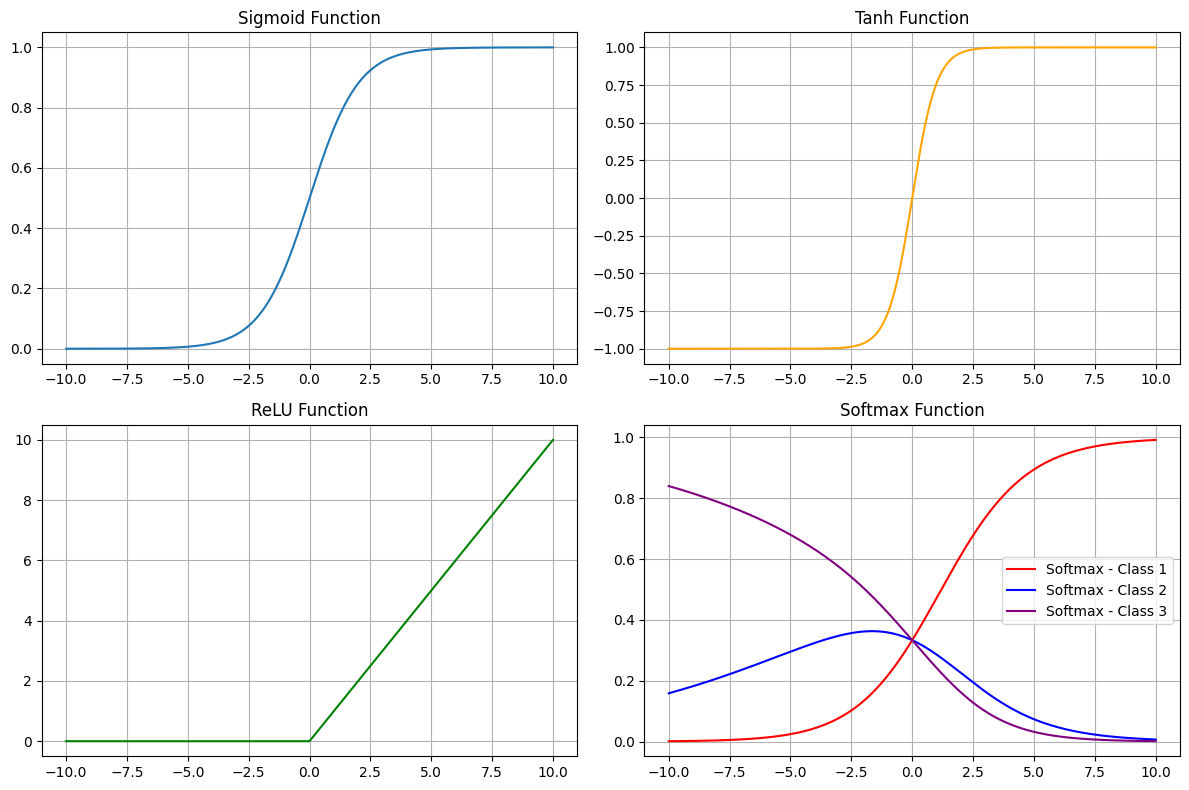

In [ ]:
# Write a program to demonstrate the working of different activation functions like Sigmoid, Tanh, RELU and softmax to train neural network.

import numpy as np
import matplotlib.pyplot as plt

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Subtract max to prevent overflow
    return exp_x / exp_x.sum(axis=0)

# Create input values
x = np.linspace(-10, 10, 400)

# Apply activation functions
sigmoid_values = sigmoid(x)
tanh_values = tanh(x)
relu_values = relu(x)

# For softmax, we use a set of values (instead of point-wise) to illustrate distribution
softmax_input = np.array([x, x/2, x/3])
softmax_values = softmax(softmax_input)

# Plotting activation functions
plt.figure(figsize=(12, 8))

# Sigmoid
plt.subplot(2, 2, 1)
plt.plot(x, sigmoid_values, label="Sigmoid")
plt.title("Sigmoid Function")
plt.grid(True)

# Tanh
plt.subplot(2, 2, 2)
plt.plot(x, tanh_values, label="Tanh", color='orange')
plt.title("Tanh Function")
plt.grid(True)

# ReLU
plt.subplot(2, 2, 3)
plt.plot(x, relu_values, label="ReLU", color='green')
plt.title("ReLU Function")
plt.grid(True)

# Softmax
plt.subplot(2, 2, 4)
plt.plot(x, softmax_values[0], label="Softmax - Class 1", color='red')
plt.plot(x, softmax_values[1], label="Softmax - Class 2", color='blue')
plt.plot(x, softmax_values[2], label="Softmax - Class 3", color='purple')
plt.title("Softmax Function")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Program 2

In [ ]:
# 2a. Design a single unit perceptron for classification of a linearly separable binary dataset without using pre-defined models. Use the Perceptron () from sklearn.
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Create a synthetic dataset with valid parameters
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_clusters_per_class=1, flip_y=0, random_state=42)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Step 3: Initialize the Perceptron model
perceptron = Perceptron(max_iter=1000, eta0=1, random_state=42)

# Step 4: Train the Perceptron model
perceptron.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = perceptron.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Optional: Print the model coefficients and intercept
print(f'Coefficients: {perceptron.coef_}')
print(f'Intercept: {perceptron.intercept_}')

# Output:
# Accuracy: 0.93
# Coefficients: [[ 7.64250985 -2.13502276]]
# Intercept: [4.]


Accuracy: 0.93
Coefficients: [[ 7.64250985 -2.13502276]]
Intercept: [4.]


In [ ]:
# 2b. Identify the problem with single unit Perceptron. Classify using Or, And and Xor data and analyze the result

import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Define datasets
datasets = {
    'OR': (np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([0, 1, 1, 1])),
    'AND': (np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([0, 0, 0, 1])),
    'XOR': (np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([0, 1, 1, 0]))
}

for name, (X, y) in datasets.items():
    # Initialize the Perceptron
    perceptron = Perceptron(max_iter=1000, eta0=1, random_state=42)

    # Train the Perceptron
    perceptron.fit(X, y)

    # Make predictions
    y_pred = perceptron.predict(X)

    # Evaluate the model
    accuracy = accuracy_score(y, y_pred)
    print(f'{name} Problem:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Coefficients: {perceptron.coef_}')
    print(f'Intercept: {perceptron.intercept_}')
    print()

OR Problem:
Accuracy: 1.00
Coefficients: [[2. 2.]]
Intercept: [-1.]

AND Problem:
Accuracy: 1.00
Coefficients: [[2. 2.]]
Intercept: [-3.]

XOR Problem:
Accuracy: 0.50
Coefficients: [[0. 0.]]
Intercept: [0.]



Program 3

Epoch 0, Loss: 0.7307
Epoch 100, Loss: 0.5579
Epoch 200, Loss: 0.4813
Epoch 300, Loss: 0.4563
Epoch 400, Loss: 0.4339
Epoch 500, Loss: 0.4017
Epoch 600, Loss: 0.4231
Epoch 700, Loss: 0.3807
Epoch 800, Loss: 0.4049
Epoch 900, Loss: 0.3963
Epoch 1000, Loss: 0.3873
Epoch 1100, Loss: 0.3692
Epoch 1200, Loss: 0.3529
Epoch 1300, Loss: 0.3594
Epoch 1400, Loss: 0.3561
Epoch 1500, Loss: 0.3365
Epoch 1600, Loss: 0.3613
Epoch 1700, Loss: 0.3408
Epoch 1800, Loss: 0.3321
Epoch 1900, Loss: 0.3570
Accuracy: 0.86


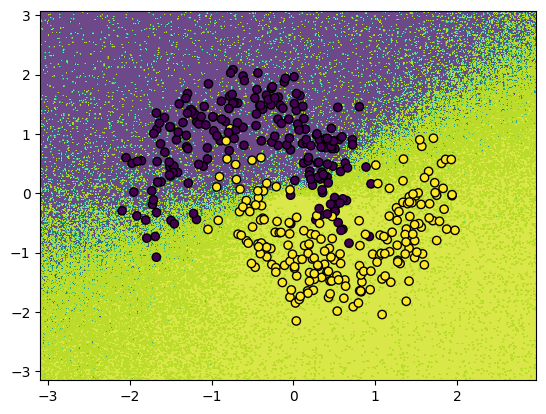

In [ ]:
# Build a deep feed forward ANN by implementing the backpropagation algorithm an test the same using appropriate dataset. Use the hidden layers >=4

import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

class DeepFeedForwardNN:
    def __init__(self, input_size, hidden_layers, output_size, learning_rate=0.01, dropout_rate=0.5):
        self.input_size = input_size
        self.hidden_layers = hidden_layers
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.dropout_rate = dropout_rate

        # Initialize weights and biases
        self.weights = []
        self.biases = []

        layer_sizes = [input_size] + hidden_layers + [output_size]
        for i in range(len(layer_sizes) - 1):
            self.weights.append(np.random.randn(layer_sizes[i], layer_sizes[i + 1]) * np.sqrt(2 / layer_sizes[i]))
            self.biases.append(np.zeros((1, layer_sizes[i + 1])))

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return (x > 0).astype(float)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, X):
        self.a = [X]
        self.z = []
        for i in range(len(self.weights)):
            z = np.dot(self.a[i], self.weights[i]) + self.biases[i]
            self.z.append(z)
            if i == len(self.weights) - 1:  # Output layer
                self.a.append(self.sigmoid(z))
            else:  # Hidden layers
                a = self.relu(z)
                # Apply dropout
                a = a * (np.random.rand(*a.shape) > self.dropout_rate) / (1 - self.dropout_rate)
                self.a.append(a)
        return self.a[-1]

    def backward(self, X, y):
        m = X.shape[0]
        self.d_weights = []
        self.d_biases = []

        # Output layer error
        d_loss = self.a[-1] - y
        d_a = d_loss / m

        for i in reversed(range(len(self.weights))):
            d_weights = np.dot(self.a[i].T, d_a)
            d_biases = np.sum(d_a, axis=0, keepdims=True)
            self.d_weights.insert(0, d_weights)
            self.d_biases.insert(0, d_biases)
            if i > 0:
                d_a = np.dot(d_a, self.weights[i].T) * self.relu_derivative(self.a[i])

    def update_parameters(self):
        for i in range(len(self.weights)):
            self.weights[i] -= self.learning_rate * self.d_weights[i]
            self.biases[i] -= self.learning_rate * self.d_biases[i]

    def compute_loss(self, y_pred, y):
        return -np.mean(y * np.log(y_pred + 1e-8) + (1 - y) * np.log(1 - y_pred + 1e-8))

    def train(self, X, y, epochs=2000):
        for epoch in range(epochs):
            y_pred = self.forward(X)
            self.backward(X, y)
            self.update_parameters()
            if epoch % 100 == 0:
                loss = self.compute_loss(y_pred, y)
                print(f'Epoch {epoch}, Loss: {loss:.4f}')

    def predict(self, X):
        return (self.forward(X) > 0.5).astype(int)

# Generate synthetic dataset
X, y = make_moons(n_samples=2000, noise=0.2, random_state=42)
y = y.reshape(-1, 1)

# Normalize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the network
nn = DeepFeedForwardNN(input_size=2, hidden_layers=[16, 16, 16, 16], output_size=1, learning_rate=0.01, dropout_rate=0.2)
nn.train(X_train, y_train, epochs=2000)

# Test the network
predictions = nn.predict(X_test)
accuracy = np.mean(predictions == y_test)
print(f'Accuracy: {accuracy:.2f}')

# Plot decision boundary
def plot_decision_boundary(pred_func, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolors='k', marker='o')
    plt.show()

plot_decision_boundary(lambda x: nn.predict(x), X_test, y_test)


Program 4

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 115ms/step - accuracy: 0.7262 - loss: 0.7895 - val_accuracy: 0.8502 - val_loss: 0.4213
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 113ms/step - accuracy: 0.8686 - loss: 0.3675 - val_accuracy: 0.8765 - val_loss: 0.3451
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 111ms/step - accuracy: 0.8863 - loss: 0.3111 - val_accuracy: 0.8832 - val_loss: 0.3190
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 110ms/step - accuracy: 0.9013 - loss: 0.2667 - val_accuracy: 0.8927 - val_loss: 0.2975
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 104ms/step - accuracy: 0.9087 - loss: 0.2458 - val_accuracy: 0.8992 - val_loss: 0.2874
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 109ms/step - accuracy: 0.9168 - loss: 0.2277 - val_accuracy: 0.9016 - val_loss: 0.2675
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 116ms/step - accuracy: 0.9230 - loss: 0.2127 - val_accuracy: 0.9046 - val_loss: 0.2604
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 77s 107ms/step - accuracy: 0.9282 - loss: 0

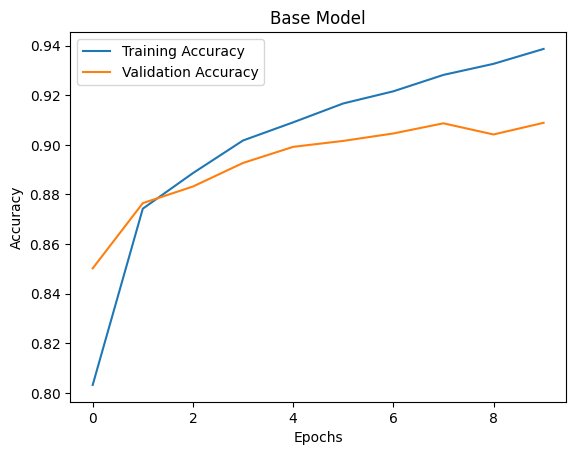

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 55s 115ms/step - accuracy: 0.6343 - loss: 2.9181 - val_accuracy: 0.7820 - val_loss: 0.9414
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 109ms/step - accuracy: 0.7922 - loss: 0.8789 - val_accuracy: 0.7950 - val_loss: 0.7758
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 110ms/step - accuracy: 0.8126 - loss: 0.7411 - val_accuracy: 0.8178 - val_loss: 0.7181
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 111ms/step - accuracy: 0.8239 - loss: 0.6951 - val_accuracy: 0.8294 - val_loss: 0.6802
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 55s 116ms/step - accuracy: 0.8280 - loss: 0.6727 - val_accuracy: 0.8258 - val_loss: 0.6696
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 110ms/step - accuracy: 0.8337 - loss: 0.6474 - val_accuracy: 0.8368 - val_loss: 0.6334
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 106ms/step - accuracy: 0.8431 - loss: 0.6230 - val_accuracy: 0.8321 - val_loss: 0.6339
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 110ms/step - accuracy: 0.8409 - loss: 0

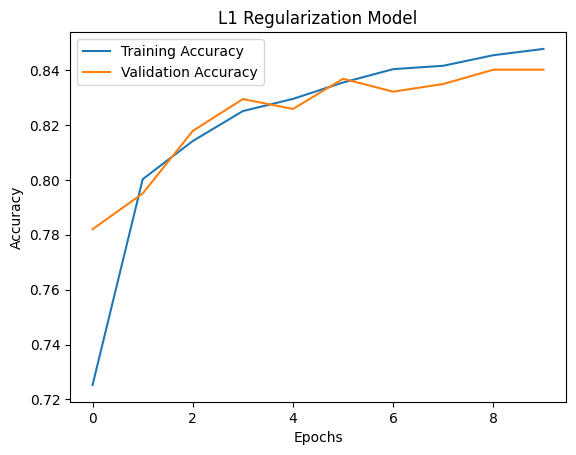

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 113ms/step - accuracy: 0.7140 - loss: 1.0061 - val_accuracy: 0.8431 - val_loss: 0.5719
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 111ms/step - accuracy: 0.8555 - loss: 0.5262 - val_accuracy: 0.8653 - val_loss: 0.4859
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 112ms/step - accuracy: 0.8719 - loss: 0.4616 - val_accuracy: 0.8666 - val_loss: 0.4680
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 113ms/step - accuracy: 0.8783 - loss: 0.4274 - val_accuracy: 0.8797 - val_loss: 0.4246
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 112ms/step - accuracy: 0.8887 - loss: 0.4002 - val_accuracy: 0.8842 - val_loss: 0.4141
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 112ms/step - accuracy: 0.8925 - loss: 0.3885 - val_accuracy: 0.8877 - val_loss: 0.3992
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 111ms/step - accuracy: 0.8914 - loss: 0.3845 - val_accuracy: 0.8783 - val_loss: 0.4195
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 117ms/step - accuracy: 0.8973 - loss: 0

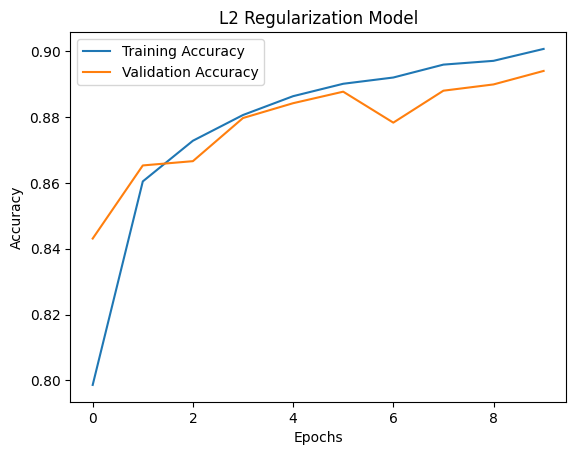

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 113ms/step - accuracy: 0.6565 - loss: 0.9437 - val_accuracy: 0.8354 - val_loss: 0.4492
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 118ms/step - accuracy: 0.8341 - loss: 0.4648 - val_accuracy: 0.8649 - val_loss: 0.3691
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 112ms/step - accuracy: 0.8592 - loss: 0.3954 - val_accuracy: 0.8756 - val_loss: 0.3380
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 112ms/step - accuracy: 0.8742 - loss: 0.3519 - val_accuracy: 0.8831 - val_loss: 0.3168
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 109ms/step - accuracy: 0.8828 - loss: 0.3218 - val_accuracy: 0.8893 - val_loss: 0.3083
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 116ms/step - accuracy: 0.8911 - loss: 0.3046 - val_accuracy: 0.8928 - val_loss: 0.2970
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 112ms/step - accuracy: 0.8943 - loss: 0.2944 - val_accuracy: 0.8983 - val_loss: 0.2815
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - accuracy: 0.9007 - loss: 0

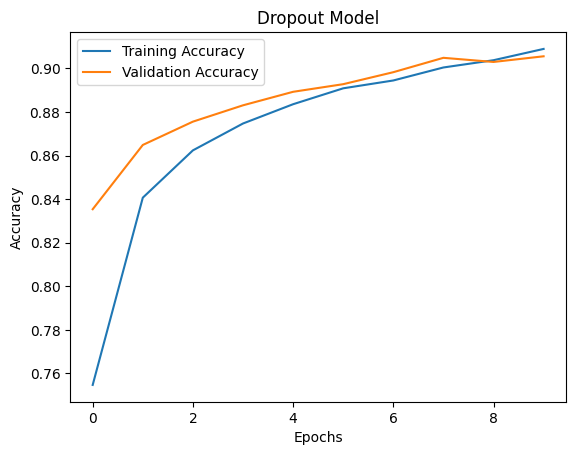

In [ ]:
# Use the concept of regularization and dropout while designing the CNN model. Use the Fashion MNIST datasets. Record the Training accuracy and Test accuracy corresponding to the following architectures:
# a. Base Model
# b. Model with L1 Regularization
# c. Model with L2 Regularization
# d. Model with Dropout

import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Step 1: Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Function to plot accuracy
def plot_accuracy(history, title):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Step 2: Build and compile the models

# Base Model
def build_base_model():
    model = models.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Model with L1 Regularization
def build_l1_model():
    model = models.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1),
                      kernel_regularizer=regularizers.l1(0.001)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu',
                      kernel_regularizer=regularizers.l1(0.001)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Model with L2 Regularization
def build_l2_model():
    model = models.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1),
                      kernel_regularizer=regularizers.l2(0.001)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu',
                      kernel_regularizer=regularizers.l2(0.001)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Model with Dropout
def build_dropout_model():
    model = models.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),  # Dropout layer to prevent overfitting
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Step 3: Train and Evaluate each Model
def train_and_evaluate(model, title):
    history = model.fit(x_train, y_train,
                        validation_data=(x_test, y_test),
                        epochs=10, batch_size=128)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"{title} Test Accuracy: {test_acc * 100:.2f}%")
    plot_accuracy(history, title)

# Base Model
base_model = build_base_model()
train_and_evaluate(base_model, "Base Model")

# Model with L1 Regularization
l1_model = build_l1_model()
train_and_evaluate(l1_model, "L1 Regularization Model")

# Model with L2 Regularization
l2_model = build_l2_model()
train_and_evaluate(l2_model, "L2 Regularization Model")

# Model with Dropout
dropout_model = build_dropout_model()
train_and_evaluate(dropout_model, "Dropout Model")



Program 5

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.8738 - loss: 0.4208 - val_accuracy: 0.9692 - val_loss: 0.1026
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9742 - loss: 0.0838 - val_accuracy: 0.9748 - val_loss: 0.0777
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9844 - loss: 0.0499 - val_accuracy: 0.9718 - val_loss: 0.0886
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9884 - loss: 0.0381 - val_accuracy: 0.9778 - val_loss: 0.0763
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9891 - loss: 0.0331 - val_accuracy: 0.9817 - val_loss: 0.0636
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


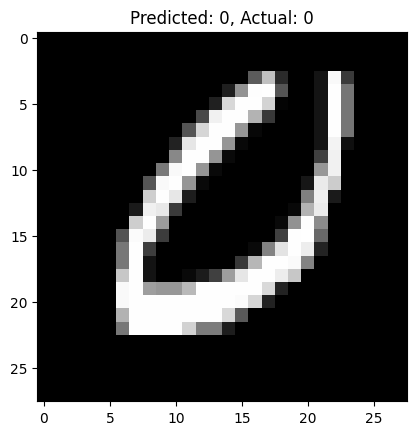

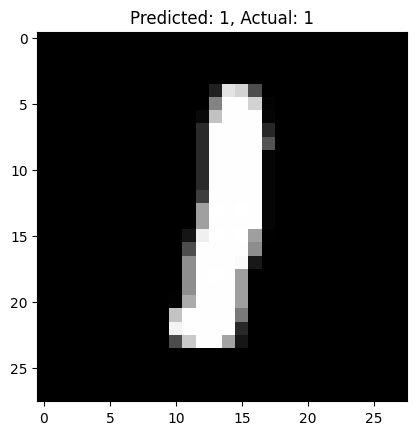

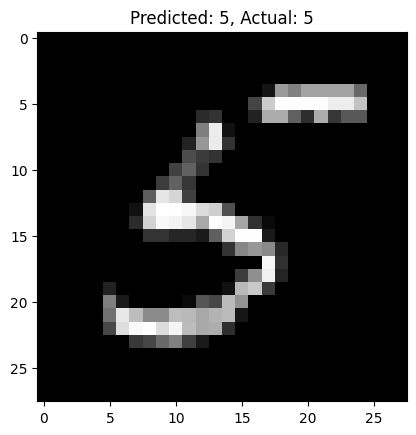

In [ ]:
# Design and implement an image classification model to classify a dataset of images using deep feed forward neural network. Record the accuracy corresponding to the number of epochs. Use MNIST datatset.

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess the Dataset
# Load the MNIST dataset (handwritten digits)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train.reshape(x_train.shape[0], 28*28).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28*28).astype('float32') / 255

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Step 2: Design the Model (Deep Feedforward Neural Network)
model = models.Sequential()

# Input layer (784 units corresponding to 28x28 pixels)
model.add(layers.InputLayer(input_shape=(28*28,)))

# Hidden layers (Dense/fully connected layers with ReLU activation)
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))

# Output layer (10 units for 10 classes, with softmax for multi-class classification)
model.add(layers.Dense(10, activation='softmax'))

# Step 3: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Train the Model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=5, batch_size=128)

# Step 5: Select your own 3 images from the MNIST test set
# Let's pick 3 random test images
indices = np.random.choice(x_test.shape[0], 3)
sample_images = x_test[indices]
sample_labels = y_test[indices]

# Step 6: Predict the class of the selected images
predictions = model.predict(sample_images)

# Convert predictions from one-hot encoded format to digits
predicted_digits = np.argmax(predictions, axis=1)
actual_digits = np.argmax(sample_labels, axis=1)

# Step 7: Display the selected images and their predicted labels
for i in range(3):
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_digits[i]}, Actual: {actual_digits[i]}")
    plt.show()



Task a: Predicting the Next Word in a Sentence

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MinMaxScaler

# Example text data
text_data = "I love machine learning. Machine learning is fascinating. I enjoy coding."
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text_data])
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for line in text_data.split('.'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_length = max(len(x) for x in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')

X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

model_word = Sequential()
model_word.add(Embedding(total_words, 100, input_length=max_sequence_length-1))
model_word.add(SimpleRNN(100))
model_word.add(Dense(total_words, activation='softmax'))

model_word.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_word.fit(X, y, epochs=100, verbose=1)

def predict_next_word(model, tokenizer, text, max_sequence_length):
    token_list = tokenizer.texts_to_sequences([text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    return tokenizer.index_word[np.argmax(predicted)]

print(predict_next_word(model_word, tokenizer, "I love", max_sequence_length))



Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 2.2175
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.1250 - loss: 2.1623
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6250 - loss: 2.1080
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8750 - loss: 2.0541
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8750 - loss: 2.0000
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8750 - loss: 1.9453
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8750 - loss: 1.8894
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8750 - loss: 1.8322
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8750 - loss: 1.7732
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8750 - loss: 1.7122
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8750 - loss: 1.6493
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8750 - loss: 1.5844

Task b: Predicting the Next Value in a Sequence of Numbers

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MinMaxScaler

data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 3
X, y = create_dataset(data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

model_value = Sequential()
model_value.add(SimpleRNN(50, return_sequences=False, input_shape=(X.shape[1], 1)))
model_value.add(Dense(1))

model_value.compile(loss='mean_squared_error', optimizer='adam')
model_value.fit(X, y, epochs=100, verbose=1)

def predict_next_value(model, data, time_step):
    data = scaler.transform(data.reshape(-1, 1))
    input_data = data[-time_step:].reshape(1, time_step, 1)
    prediction = model.predict(input_data)
    return scaler.inverse_transform(prediction)[0][0]

next_value = predict_next_value(model_value, data[-time_step:], time_step)
print(next_value)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.2852
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2238
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1699
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1237
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0852
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0546
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0317
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0163
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0079
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0057
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0083
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0139
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0206
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0266
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0306
Epoch 16/100
1/1 ━━━━━━━━━━━━━━━━

Program 6

In [ ]:
# Implement bidirectional LSTM for sentiment analysis on movie reviews

import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Parameters
vocab_size = 10000  # Number of unique words in the dataset
max_length = 100  # Maximum length of sequences
embedding_dim = 128  # Dimension of the embedding space
batch_size = 64
epochs = 5

# Load IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to make them of uniform length
x_train = pad_sequences(x_train, maxlen=max_length, padding='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post')

# Build the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


391/391 ━━━━━━━━━━━━━━━━━━━━ 150s 363ms/step - accuracy: 0.7076 - loss: 0.5330 - val_accuracy: 0.8527 - val_loss: 0.3307
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 146s 374ms/step - accuracy: 0.9051 - loss: 0.2389 - val_accuracy: 0.8511 - val_loss: 0.3425
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 195s 355ms/step - accuracy: 0.9457 - loss: 0.1485 - val_accuracy: 0.8364 - val_loss: 0.4359
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 134s 335ms/step - accuracy: 0.9727 - loss: 0.0759 - val_accuracy: 0.8358 - val_loss: 0.5420
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 142s 335ms/step - accuracy: 0.9867 - loss: 0.0398 - val_accuracy: 0.8322 - val_loss: 0.6820
Test Accuracy: 0.8322


Program 7

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Resize images to 48x48 for faster training
x_train = tf.image.resize(x_train, (48, 48))
x_test = tf.image.resize(x_test, (48, 48))

# Convert labels to one-hot encoding
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Create the VGG-16 model with frozen base layers
def create_vgg16_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
    base_model.trainable = False  # Freeze VGG16 base layers
    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),  # Dropout to reduce overfitting
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Create the VGG-19 model with frozen base layers
def create_vgg19_model():
    base_model = VGG19(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
    base_model.trainable = False  # Freeze VGG19 base layers
    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Compile and train the VGG-16 model
vgg16_model = create_vgg16_model()
vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the VGG-16 model with reduced epochs and batch size
vgg16_history = vgg16_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the VGG-16 model
vgg16_loss, vgg16_accuracy = vgg16_model.evaluate(x_test, y_test)
print(f'VGG-16 Test Loss: {vgg16_loss:.4f}')
print(f'VGG-16 Test Accuracy: {vgg16_accuracy:.2f}')

# Compile and train the VGG-19 model
vgg19_model = create_vgg19_model()
vgg19_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the VGG-19 model with reduced epochs and batch size
vgg19_history = vgg19_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the VGG-19 model
vgg19_loss, vgg19_accuracy = vgg19_model.evaluate(x_test, y_test)
print(f'VGG-19 Test Loss: {vgg19_loss:.4f}')
print(f'VGG-19 Test Accuracy: {vgg19_accuracy:.2f}')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
1371/1563 ━━━━━━━━━━━━━━━━━━━━ 3:28 1s/step - accuracy: 0.4134 - loss: 1.6622

KeyboardInterrupt: 